# Trajectoire (t,d) du véhicule ego en fonction du lieu de circulation

### Essaie à vide

In [ ]:
# On va tenter de tracer la trajectoire du véhicule ego 
# en mettant une légende sur le lieu de circulation 

In [1]:
%matplotlib inline
from nuscenes.nuscenes import NuScenes
nusc = NuScenes(version='v1.0-mini', dataroot='/Users/tiffanydarini/nuscenes-devkit/python-sdk/tutorials/data/sets/nuscenes/v1.0-mini', verbose=True)

Loading NuScenes tables for version v1.0-mini...
23 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
Done loading in 0.338 seconds.
Reverse indexing ...
Done reverse indexing in 0.1 seconds.


In [2]:
# On récupère le token de la scène à partir du nom
scene_name = 'scene-0061'
scene_token = nusc.field2token('scene','name',scene_name)[0]
scene_token

'cc8c0bf57f984915a77078b10eb33198'

In [3]:
# On récupère le nom de la carte 
log_token = nusc.get('scene',scene_token)['log_token']
log_token
location = nusc.get('log',log_token)['location']
map_token = nusc.get('log',log_token)['map_token']
location

'singapore-onenorth'

In [4]:
# On va utiliser l'extension Map pour récupérer des données sur la carte 

import matplotlib.pyplot as plt
import tqdm
import numpy as np

from nuscenes.map_expansion.map_api import NuScenesMap
from nuscenes.map_expansion import arcline_path_utils
from nuscenes.map_expansion.bitmap import BitMap

# On récupère les données sur la carte dont le nom est location 
nusc_map = NuScenesMap(dataroot='/Users/tiffanydarini/nuscenes-devkit/python-sdk/tutorials/data/sets/nuscenes/v1.0-mini', map_name=location)

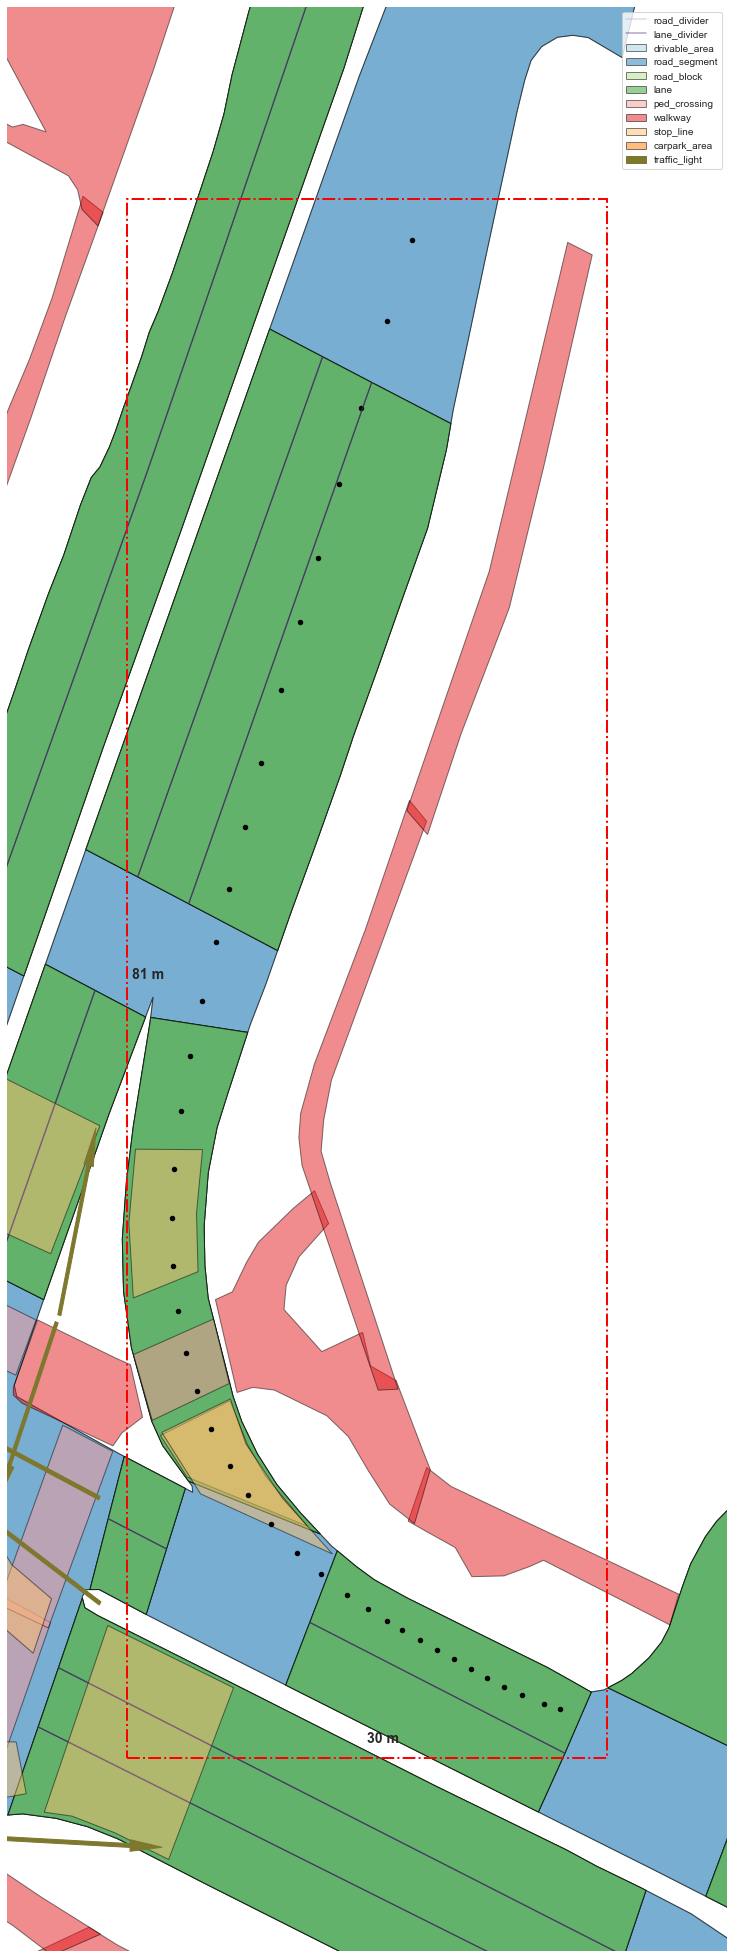

In [5]:
ego_poses = nusc_map.render_egoposes_on_fancy_map(nusc,scene_token,verbose=False)

In [6]:
x = 873
y = 1280
# Renvoie pour le point (x,y), les couches présentes à cet endroit 
print('Road objects on selected point:', nusc_map.layers_on_point(x, y), '\n') 

Road objects on selected point: {'drivable_area': 'c3e28556-b711-4581-9970-b66166fb907d', 'road_segment': '5428b143-6343-4045-ac81-466df3dcc510', 'road_block': '9aa7a714-30ba-4892-a276-c033928a8ae2', 'lane': 'f747ce8a-2396-4da3-a8e6-45201ed470d6', 'ped_crossing': '', 'walkway': '', 'stop_line': '7bbc759a-616b-45f2-9f6c-28790b027a94', 'carpark_area': ''} 



In [7]:
# Fonction qui renvoie les tables ego_pose d'une scène donnée
def get_poses(scene_token):
    pose_list = []
    scene_rec = nusc.get('scene', scene_token)
    sample_rec = nusc.get('sample', scene_rec['first_sample_token'])
    sd_rec = nusc.get('sample_data', sample_rec['data']['LIDAR_TOP'])
    
    ego_pose = nusc.get('ego_pose', sd_rec['token'])
    pose_list.append(ego_pose)

    while sd_rec['next'] != '':
        sd_rec = nusc.get('sample_data', sd_rec['next'])
        ego_pose = nusc.get('ego_pose', sd_rec['token'])
        pose_list.append(ego_pose)

    return pose_list

In [8]:
# Création des liste de coordonnées du véhicule égo 
Liste_ego_poses = get_poses(scene_token) 
X_coord =[]
Y_coord =[]
Z_coord =[]
T_timestamp = [] # liste des timestamps
for k in range(0,len(Liste_ego_poses)):
    X_coord.append(Liste_ego_poses[k]['translation'][0])
    Y_coord.append(Liste_ego_poses[k]['translation'][1])
    Z_coord.append(Liste_ego_poses[k]['translation'][2])
    T_timestamp.append(Liste_ego_poses[k]['timestamp'])

In [9]:
# Recupération des distances et temps correspondants :
from math import sqrt
import datetime 
from datetime import timedelta

D =[0]
T=[0]
for k in range(0,len(T_timestamp)-1):
    d = D[k]+ sqrt((X_coord[k+1]-X_coord[k])**2+(Y_coord[k+1]-Y_coord[k])**2+(Z_coord[k+1]-Z_coord[k])**2)
    D.append(d)
    t2 = datetime.datetime.fromtimestamp(T_timestamp[k+1]/ 1e6)
    t1 = datetime.datetime.fromtimestamp(T_timestamp[k]/ 1e6)
    t = T[k]+(t2-t1).total_seconds() 
    T.append(t)

In [10]:
Layers_ego = []
for k in range(0,len(X_coord)):
    x = X_coord[k]
    y = Y_coord[k]
    L = nusc_map.layers_on_point(x, y)
    H = [j for j in L] # liste des layers présentes dans L 
    a=[]
    for i in H : 
        if len(L[i])>0 :
            a.append(i)
    Layers_ego.append(a)
Layers_ego


[['drivable_area', 'road_segment'],
 ['drivable_area', 'road_segment'],
 ['drivable_area', 'road_segment'],
 ['drivable_area', 'road_segment'],
 ['drivable_area', 'road_segment'],
 ['drivable_area', 'road_segment'],
 ['drivable_area', 'road_segment'],
 ['drivable_area', 'road_segment'],
 ['drivable_area', 'road_segment'],
 ['drivable_area', 'road_segment'],
 ['drivable_area', 'road_segment'],
 ['drivable_area', 'road_segment'],
 ['drivable_area', 'road_segment'],
 ['drivable_area', 'road_segment'],
 ['drivable_area', 'road_segment'],
 ['drivable_area', 'road_segment'],
 ['drivable_area', 'road_segment'],
 ['drivable_area', 'road_segment'],
 ['drivable_area', 'road_segment', 'road_block', 'lane'],
 ['drivable_area', 'road_segment', 'road_block', 'lane'],
 ['drivable_area', 'road_segment', 'road_block', 'lane'],
 ['drivable_area', 'road_segment', 'road_block', 'lane'],
 ['drivable_area', 'road_segment', 'road_block', 'lane'],
 ['drivable_area', 'road_segment', 'road_block', 'lane'],
 ['d

In [11]:
# On se rend compte que pour chaque point, il y a plusieurs couches, la dernière de la liste
# semble être la plus importante donc on va tracer avec ça 
Layers_ego_final = [x[len(x)-1] for x in Layers_ego]
Layers_ego_final

['road_segment',
 'road_segment',
 'road_segment',
 'road_segment',
 'road_segment',
 'road_segment',
 'road_segment',
 'road_segment',
 'road_segment',
 'road_segment',
 'road_segment',
 'road_segment',
 'road_segment',
 'road_segment',
 'road_segment',
 'road_segment',
 'road_segment',
 'road_segment',
 'lane',
 'lane',
 'lane',
 'lane',
 'lane',
 'lane',
 'lane',
 'lane',
 'lane',
 'lane',
 'lane',
 'lane',
 'lane',
 'lane',
 'lane',
 'lane',
 'lane',
 'lane',
 'lane',
 'lane',
 'lane',
 'lane',
 'lane',
 'lane',
 'lane',
 'lane',
 'lane',
 'lane',
 'lane',
 'lane',
 'lane',
 'lane',
 'lane',
 'lane',
 'lane',
 'lane',
 'lane',
 'lane',
 'lane',
 'lane',
 'lane',
 'lane',
 'lane',
 'lane',
 'lane',
 'lane',
 'lane',
 'lane',
 'lane',
 'lane',
 'lane',
 'lane',
 'lane',
 'lane',
 'lane',
 'lane',
 'lane',
 'lane',
 'lane',
 'lane',
 'lane',
 'lane',
 'lane',
 'lane',
 'lane',
 'lane',
 'lane',
 'lane',
 'lane',
 'lane',
 'lane',
 'lane',
 'lane',
 'lane',
 'lane',
 'lane',
 'lane',
 

In [12]:
# Liste des couches présentes dans la scène
Liste = list(set(Layers_ego_final))
Liste 

['stop_line', 'lane', 'road_segment', 'ped_crossing']

In [13]:
import pandas as pd 

In [14]:
df = pd.DataFrame({'T':T,'D': D,'Layers':Layers_ego_final})
df

,T,D,Layers
0,0.000000,0.000000,road_segment
1,0.049801,0.454952,road_segment
2,0.099538,0.908208,road_segment
3,0.149855,1.366303,road_segment
4,0.200646,1.826834,road_segment
...,...,...,...
377,18.949395,90.926245,lane
378,18.999167,91.017468,lane
379,19.050087,91.113338,lane
380,19.099263,91.214095,lane


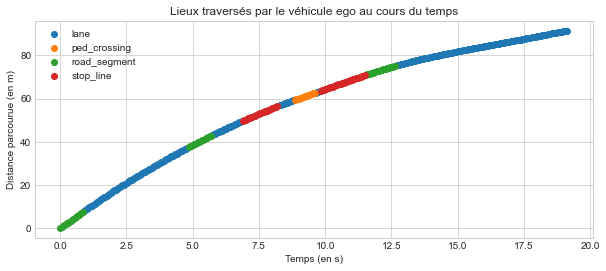

In [15]:
# On trace la figure 
fig, ax = plt.subplots(figsize=(10,4))
for key, grp in df.groupby(['Layers']):
    ax.scatter(grp['T'], grp['D'], label=key)

ax.legend()
plt.xlabel('Temps (en s)')
plt.ylabel('Distance parcourue (en m)')
plt.title('Lieux traversés par le véhicule ego au cours du temps')
plt.show()

### Automatisation du tracé

In [16]:
# Automatisation pour une scène donnée (nusc doit être importé avant)

from math import sqrt
import datetime 
from datetime import timedelta
import pandas as pd

# Base de données Map expansion (il faut le faire à l'intérieur de la fonction car il faut la carte correspondant à la scène)
import matplotlib.pyplot as plt
import tqdm
import numpy as np

from nuscenes.map_expansion.map_api import NuScenesMap
from nuscenes.map_expansion import arcline_path_utils
from nuscenes.map_expansion.bitmap import BitMap


def dyna_ego_road(scene_name):
    
    # On récupère le token de la scène à partir du nom
    scene_token = nusc.field2token('scene','name',scene_name)[0]
    
    Liste_ego_poses = get_poses(scene_token) # on récupère la liste des ego_poses correspondant 
    
    # Création des liste de coordonnées du véhicule égo 
    X_coord =[]
    Y_coord =[]
    Z_coord =[]
    T_timestamp = [] # liste des timestamps
    for k in range(0,len(Liste_ego_poses)):
        X_coord.append(Liste_ego_poses[k]['translation'][0])
        Y_coord.append(Liste_ego_poses[k]['translation'][1])
        Z_coord.append(Liste_ego_poses[k]['translation'][2])
        T_timestamp.append(Liste_ego_poses[k]['timestamp'])
        
    # On crée les listes de distances et de temps     
    D =[0]
    T=[0]
    for k in range(0,len(T_timestamp)-1):
        d = D[k]+ sqrt((X_coord[k+1]-X_coord[k])**2+(Y_coord[k+1]-Y_coord[k])**2+(Z_coord[k+1]-Z_coord[k])**2)
        D.append(d)
        t2 = datetime.datetime.fromtimestamp(T_timestamp[k+1]/ 1e6)
        t1 = datetime.datetime.fromtimestamp(T_timestamp[k]/ 1e6)
        t = T[k]+(t2-t1).total_seconds() 
        T.append(t)
    
    # On récupère le nom de la carte 
    log_token = nusc.get('scene',scene_token)['log_token']
    location = nusc.get('log',log_token)['location']
    
    # On récupère les données sur la carte dont le nom est location 
    nusc_map = NuScenesMap(dataroot='/Users/tiffanydarini/nuscenes-devkit/python-sdk/tutorials/data/sets/nuscenes/v1.0-mini', map_name=location)
    
    # Création de la liste de couches sur lesquelles chaque point est présent 
    Layers_ego = []
    for k in range(0,len(X_coord)):
        x = X_coord[k]
        y = Y_coord[k]
        L = nusc_map.layers_on_point(x, y)
        H = [j for j in L] # liste des layers présentes dans L 
        a=[]
        for i in H : 
            if len(L[i])>0 :
                a.append(i)
        Layers_ego.append(a)
    
    # On ne conserve que la dernière couche 
    Layers_ego_final = [x[len(x)-1] for x in Layers_ego]
    
    # Création de la df associée 
    df = pd.DataFrame({'T':T,'D': D,'Layers':Layers_ego_final})
    
    # On trace la figure 
    fig, ax = plt.subplots(figsize=(10,4))
    for key, grp in df.groupby(['Layers']):
        ax.scatter(grp['T'], grp['D'], label=key)

    ax.legend()
    plt.xlabel('Temps (en s)')
    plt.ylabel('Distance parcourue (en m)')
    plt.title('Lieux traversés par le véhicule ego au cours du temps')
    plt.show()

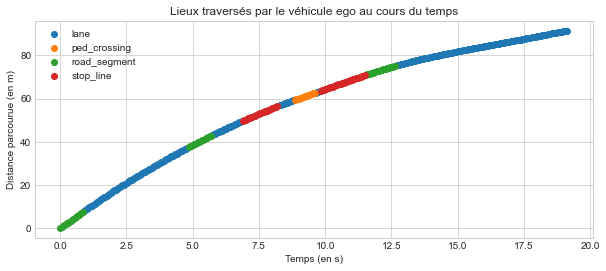

In [17]:
scene_name = 'scene-0061'
dyna_ego_road(scene_name)

### Test sur plusieurs scènes

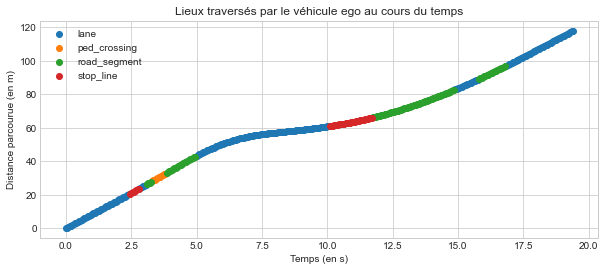

In [18]:
# scene-0103
scene_name = 'scene-0103'
dyna_ego_road(scene_name)

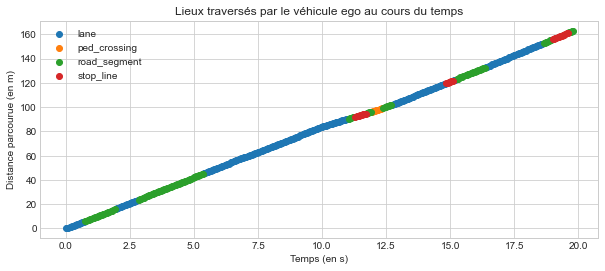

In [19]:
# scene-0655
scene_name = 'scene-0655'
dyna_ego_road(scene_name)

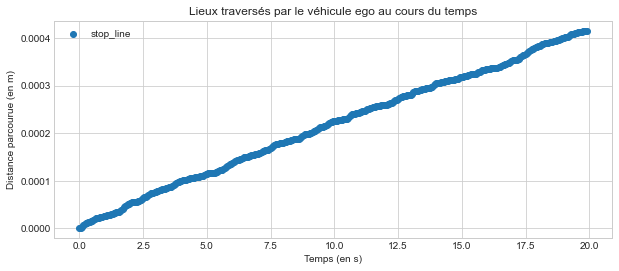

In [20]:
# scene-0553 (véhicule à l'arrêt sur la vidéo)
scene_name = 'scene-0553'
dyna_ego_road(scene_name)

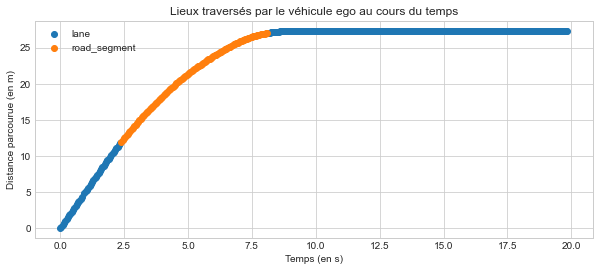

In [21]:
# scene-0757
scene_name = 'scene-0757'
dyna_ego_road(scene_name)

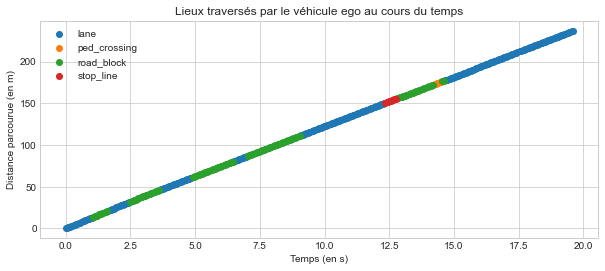

In [22]:
# scene-0796
scene_name = 'scene-0796'
dyna_ego_road(scene_name)

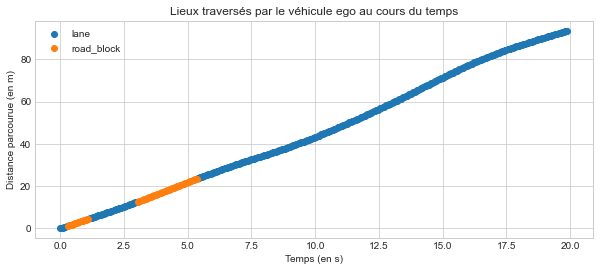

In [23]:
# scene-0916
scene_name = 'scene-0916'
dyna_ego_road(scene_name)

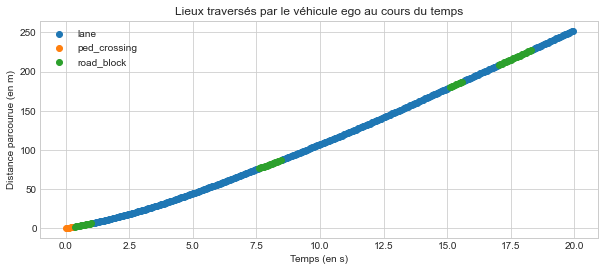

In [24]:
# scene-1077
scene_name = 'scene-1077'
dyna_ego_road(scene_name)

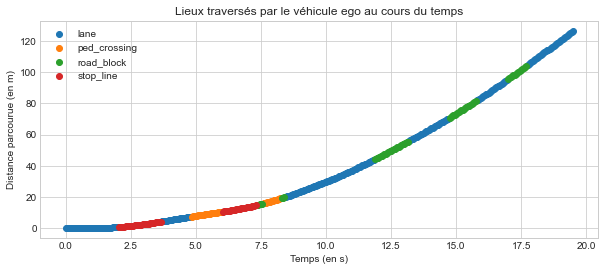

In [25]:
# scene-1094
scene_name = 'scene-1094'
dyna_ego_road(scene_name)

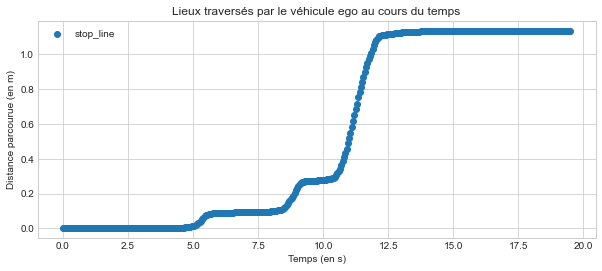

In [26]:
# scene-1100
scene_name = 'scene-1100'
dyna_ego_road(scene_name)

# Trajectoire (t,d) du véhicule ego et des éléments autour 

In [27]:
# On va tracer d'abord les (t,d) pour tous les éléments mobiles, on tentera ensuite
# de rajouter comme précédemment le lieu de circulation.
# Il faut que le 0 corresponde au 0 du véhicule ego donc il va falloir décaler chacun des 
# éléments dans le temps 

## Essaie dans le vide 

### Étape 1 : On choisit une scène et on récupère les échantillons de la scène 

In [27]:
# On choisit une scène 
scene_name = 'scene-0061'
scene_token = nusc.field2token('scene','name',scene_name)[0]

# Ensemble des token des échantillons de la scene 
sample_token = nusc.field2token('sample','scene_token',scene_token)
len(sample_token)

39

### Étape 2 : On récupère les sample_annotation de la scène (boites d'objets dans la scène)

In [28]:
# Ensemble des sample_annotation de la scène :

sample_annotation_token = []
for k in sample_token : 
    L = nusc.field2token('sample_annotation','sample_token',k)
    sample_annotation_token = sample_annotation_token + L

len(sample_annotation_token)


4699

### Étape 3 : Liste des instances dans la scène

In [29]:
# On créé la liste des token des instances présents dans les sample_annotation
L_instance_token = []
for k in sample_annotation_token :
    exemple = nusc.get('sample_annotation', k)
    L_instance_token.append(exemple['instance_token'])

In [30]:
# Puisque pour un même objet, on peut avoir plusieurs annotations, on supprime les doublons de L
L_instance_token = list(set(L_instance_token))
len(L_instance_token)
print('Il y a '+str(len(L_instance_token))+' instances dans la scène ' +scene_name)

Il y a 227 instances dans la scène scene-0061


### Étape 4 : Séparation de chaque catégorie 

In [31]:
# Liste des catégories d'objet dans la scène 
L_category_name = []
for k in sample_annotation_token :
    exemple = nusc.get('sample_annotation', k)
    L_category_name.append(exemple['category_name'])
L_category_name = list(set(L_category_name))
L_category_name

['movable_object.trafficcone',
 'human.pedestrian.adult',
 'movable_object.barrier',
 'movable_object.pushable_pullable',
 'movable_object.debris',
 'vehicle.construction',
 'human.pedestrian.construction_worker',
 'vehicle.bicycle',
 'vehicle.bus.rigid',
 'vehicle.motorcycle',
 'vehicle.truck',
 'vehicle.car']

In [32]:
# Pour l'instant, travail à la main pour chaque catégorie trouvé
k = 7
catego_name = L_category_name[k]
catego_token = nusc.field2token('category','name',catego_name)
category = nusc.get('category',catego_token[0])
category

{'token': 'fc95c87b806f48f8a1faea2dcc2222a4',
 'name': 'vehicle.bicycle',
 'description': 'Human or electric powered 2-wheeled vehicle designed to travel at lower speeds either on road surface, sidewalks or bike paths.'}

In [33]:
# Ensemble des instances appartenant à la fois à la scène et à la catégorie
L_instance_category = nusc.field2token('instance','category_token',catego_token[0]) # instance dans la catégorie
L_instance_category = [x for x in L_instance_category if x in L_instance_token]# et dans la scène 
L_instance_category

['f4b2632a2f9947da9f7959a3bd0e322c',
 'f0056532879643c69e4efc9d845782f0',
 '12c1f51f9c284f3ea74dbdef151cf24b']

In [34]:
L=[]
for k in L_instance_category : 
    instance_category = nusc.get('instance',k)
    nbr_annotations = instance_category['nbr_annotations']
    if nbr_annotations == 1:
        L.append([instance_category['first_annotation_token']])
    else : 
        H = []
        first_token = instance_category['first_annotation_token']
        last_token = instance_category['last_annotation_token']
        current_token = first_token 
        
        i = 0 
        while i!= nbr_annotations :
            current_ann = nusc.get('sample_annotation', current_token)
            H.append(current_ann['token'])
            current_token = current_ann['next'] #On passe au suivant
            i+=1
        L.append(H)
L
# Il peut y avoir plusieurs éléments de la catégorie dans la scène, ici chaque ligne de L représente 
# les token des sample_annotation pour un élément de cette catégorie. 


[['36d52dfedd764b27863375543c965376',
  '86214ec54d034a839ee1f400719d49b2',
  'd48d02b79fa3450c84803e29acd9ad04',
  'ac4423fb0f584cfbb95739e1e4982b0e',
  '0483e1c2b73f4a26bd8cfe974ba83c3e',
  '8a24e6271a27423e826abddffc7458d3',
  'cce69e28c4504554a588cf6efb891c4c',
  'c3c6edc917294ad898daa1cb31158d08',
  '74d21bb8b7bb466089924cce5a9bab67',
  '7ba9dd7425604d16bd034799194ccbcd',
  '7b5cdac8abc74352953d5d48f0c6b2ef',
  '83b117e7f2a3458b8d1a9a3f18548d4a',
  'e09c419561b0480ba37d526a1d087be3',
  'e5968c4fe56741639863d9d7f7977c32',
  '71e878a5109a4efb9c656bcb8b171835',
  'fd2df9f97bf44a53bb7ad88958150be7',
  '1e57eb24d9de40d88f3257def0958894',
  '1309a1f9a7204b24add49661c6bb5a04',
  'e0e08882d4bf43deb588948f4b41ee23',
  'ee477ab9e1f44ac089010ef60904ec2c',
  '6289aeaafb0c42b1a55bf0f680cef30f',
  '37e9065439364342b68d8cfafbb3f54f',
  'a1a074349a42403fa3bc37f208a11f5d',
  'a9a847da2d0c49e89f1c115386db79cd',
  '7d76321bdfa44e26ade028dc64f8c2b7',
  '104a7ca23dc742a3b2e0d93b94c7a2bb',
  'b3184a0da

In [35]:
# Maintenant qu'on a les token de tous les sample_annotation pour tous les éléments d'une même catégorie, 
# on va pouvoir récupérer leurs positions 

X = []
Y = []
Z = []
T_time = []
for k in L :
    x = []
    y = []
    z = []
    t = []
    for j in k :
        sample_annotation = nusc.get('sample_annotation',j)
        x.append(sample_annotation['translation'][0])
        y.append(sample_annotation['translation'][1])
        z.append(sample_annotation['translation'][2])
        t.append(nusc.get('sample',sample_annotation['sample_token'])['timestamp'])
    X.append(x)
    Y.append(y)
    Z.append(z)
    T_time.append(t)
        
# On crée les matrices de distance et temps pour tracer les diagrammes espace-temps      
D_catego =[]
T_catego =[]
for j in range(0,len(X)-1):
    
    if T_timestamp[0] == T_time[j][0] : # Même t départ avec le véhicule ego :
        d = [sqrt((X[j][0]-X_coord[0])**2+(Y[j][0]-Y_coord[0])**2+(Z[j][0]-Z_coord[0])**2)]
        t_time = [0]
    else : # t de départ différent avec le véhicule ego 
    
        # Décalage dans le temps
        t_time = [(datetime.datetime.fromtimestamp(T_time[j][0]/ 1e6) - datetime.datetime.fromtimestamp(T_timestamp[0]/ 1e6)).total_seconds()]
    
        # Décalage dans l'espace 
        e = T_timestamp.index(T_time[j][0])
        # Avec e l'indice du timestamp du véhicule égo pour lequel le timestamp correspondant est égal au premier timestamp de l'élément de la catégorie
        d = [sqrt((X[j][0]-X_coord[e])**2+(Y[j][0]-Y_coord[e])**2+(Z[j][0]-Z_coord[e])**2)] 

    for k in range(0,len(X[j])-1):
        d.append(d[k]+sqrt((X[j][k+1]-X[j][k])**2+(Y[j][k+1]-Y[j][k])**2+(Z[j][k+1]-Z[j][k])**2))
        t2 = datetime.datetime.fromtimestamp(T_time[j][k+1]/ 1e6) # on met les timestamp en datetime
        t1 = datetime.datetime.fromtimestamp(T_time[j][k]/ 1e6)
        t = t_time[k]+(t2-t1).total_seconds() # On récupère le temps en seconde 
        t_time.append(t)
    D_catego.append(d)
    T_catego.append(t_time)

In [36]:
len(T_time)
L = [ len(k) for k in T_time]
max(L)
# Pour chaque élément de la catégorie, on a au max 39 annotations puisqu'il y a seulement 39 sample 

35

### Étape 5 : Fonction pour savoir si un objet est immobile ou pas

In [37]:
# On crée une fonction qui renvoie la liste des rangs dans les listes X,Y des objets immobiles de 
# cette liste et donc d'une même catégorie, ainsi que la liste des objets mobiles 

def immobile(X,Y):
    Immo = []
    Mobile = []
    n = len(X) # Nombre d'élément dans la catégorie 
    for i in range(0,n-1):
        X_coord = X[i]
        Y_coord = Y[i]
        if len(X_coord)==1 :
            Immo.append(i)
        else : 
            d = 0 
            for k in range(0,len(X_coord)-1):
                d+= sqrt((X_coord[k+1]-X_coord[k])**2+(Y_coord[k+1]-Y_coord[k])**2)
            if d<2 : # Si la distance totale parcourue par l'objet est inférieur à 2m, on considère que l'objet bouge pas
                Immo.append(i)
            else :
                Mobile.append(i)
    return Immo,Mobile

### Étape 6 : Tracer 

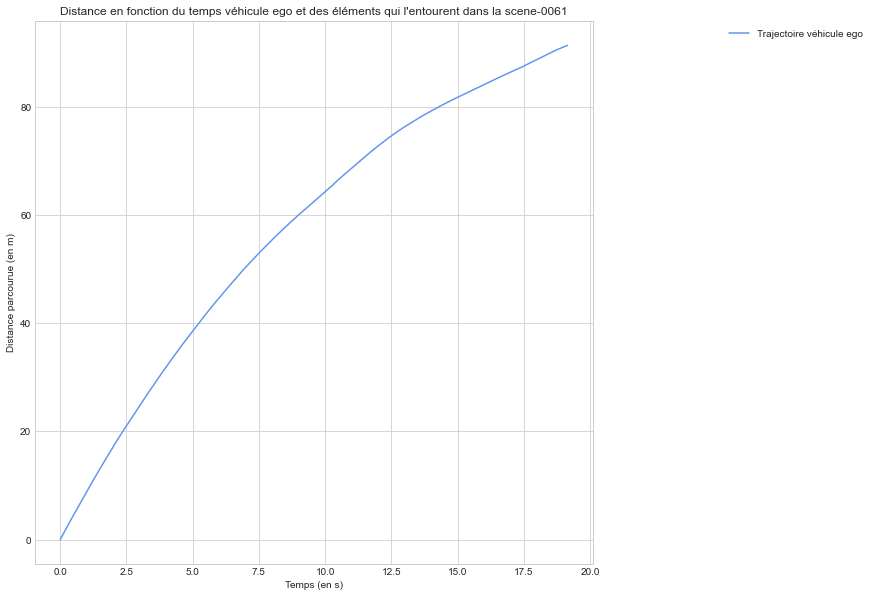

In [38]:
c = ['g','darkorange','firebrick','c','indigo','k','hotpink','purple','olive','grey','rosybrown','chartreuse','magenta','gold','lavender','aqua','darkkhaki','lightgrey','pink','palegreen','navy','violet','sandybrown']
couleur_catego = c[8]

fig = plt.figure(1, figsize=(10, 10))
        
# On crée les listes des objets immobiles et mobiles de la catégorie
Immo, Mobile = immobile(X,Y)
if len(Mobile)==1 :
    plt.plot(T_catego[Mobile[0]],D_catego[Mobile[0]],label=catego_name,color=couleur_catego)
elif len(Mobile)>1:
    plt.plot(T_catego[Mobile[0]],D_catego[Mobile[0]],label=catego_name,color=couleur_catego)
    for i in range(1,len(Mobile)):
        indice = Mobile[i]
        plt.plot(T_catego[indice],D_catego[indice],color=couleur_catego)

# On trace 
plt.plot(T,D,label ='Trajectoire véhicule ego',color='cornflowerblue')
plt.xlabel('Temps (en s)') 
plt.ylabel('Distance parcourue (en m)') # Les x,y,z sont en m 
plt.legend(bbox_to_anchor=(1.5, 1.0),loc='best')
plt.title("Distance en fonction du temps véhicule ego et des éléments qui l'entourent dans la "+scene_name)
plt.show()

### Étape 7 : Automatisation du tracer

In [39]:
# On le fait d'abord sans décalage dans le temps 

#imports nécessaires
import matplotlib.pyplot as plt
from math import sqrt
import datetime 
from datetime import timedelta

def dyna_ego_env(scene_name):
    
    scene_token = nusc.field2token('scene','name',scene_name)[0]
    sample_token = nusc.field2token('sample','scene_token',scene_token)# Ensemble des token des échantillons de la scene 
    
    # Pour tracer la trajectoire du véhicule ego
    Liste_ego_poses = get_poses(scene_token) 
    X_coord =[]
    Y_coord =[]
    Z_coord =[]
    T_timestamp = [] # liste des timestamps
    for k in range(0,len(Liste_ego_poses)):
        X_coord.append(Liste_ego_poses[k]['translation'][0])
        Y_coord.append(Liste_ego_poses[k]['translation'][1])
        Z_coord.append(Liste_ego_poses[k]['translation'][2])
        T_timestamp.append(Liste_ego_poses[k]['timestamp'])

    # On crée les listes de distances et de temps 
    D =[0]
    T=[0]
    for k in range(0,len(T_timestamp)-1):
        D.append(D[k]+sqrt((X_coord[k+1]-X_coord[k])**2+(Y_coord[k+1]-Y_coord[k])**2+(Z_coord[k+1]-Z_coord[k])**2))
        t2 = datetime.datetime.fromtimestamp(T_timestamp[k+1]/ 1e6) # on met les timestamp en datetime
        t1 = datetime.datetime.fromtimestamp(T_timestamp[k]/ 1e6)
        t = T[k]+(t2-t1).total_seconds() # On récupère le temps en seconde 
        T.append(t)
    
    # Ensemble des sample_annotation de la scène :
    sample_annotation_token = []
    for k in sample_token : 
        L = nusc.field2token('sample_annotation','sample_token',k)
        sample_annotation_token = sample_annotation_token + L
    
    # On créé la liste des token des instances présents dans les sample_annotation
    L_instance_token = []
    for k in sample_annotation_token :
        exemple = nusc.get('sample_annotation', k)
        L_instance_token.append(exemple['instance_token'])
    # Puisque pour un même objet, on peut avoir plusieurs annotations, on supprime les doublons de L
    L_instance_token = list(set(L_instance_token))
    
    # Liste des catégories d'objet dans la scène 
    L_category_name = []
    for k in sample_annotation_token :
        exemple = nusc.get('sample_annotation', k)
        L_category_name.append(exemple['category_name'])
    L_category_name = list(set(L_category_name)) #on supprime les doublons 
   
    # On crée une liste de 23 couleurs car il y a au maximum 23 catégories dans une scène 
    c = ['g','darkorange','firebrick','c','indigo','k','hotpink','purple','olive','grey','rosybrown','chartreuse','magenta','gold','lavender','aqua','darkkhaki','lightgrey','pink','palegreen','navy','violet','sandybrown']
    
    # Boucle sur chaque catégorie trouvée
    for j in range(0,len(L_category_name)):   
        couleur_catego = c[j]
        catego_name = L_category_name[j]
        catego_token = nusc.field2token('category','name',catego_name)
        category = nusc.get('category',catego_token[0])

        # Ensemble des instances appartenant à la fois à la scène et à la catégorie
        L_instance_category = nusc.field2token('instance','category_token',catego_token[0]) # instance dans la catégorie
        L_instance_category = [x for x in L_instance_category if x in L_instance_token]# et dans la scène 
        L_instance_category
        
        # Il peut y avoir plusieurs éléments de la catégorie dans la scène, ici chaque ligne de L représente 
        # les token des sample_annotation pour un élément de cette catégorie. 

        L=[]
        for k in L_instance_category : 
            instance_category = nusc.get('instance',k)
            nbr_annotations = instance_category['nbr_annotations']
            if nbr_annotations == 1:
                L.append([instance_category['first_annotation_token']])
            else : 
                H = []
                first_token = instance_category['first_annotation_token']
                last_token = instance_category['last_annotation_token']
                current_token = first_token 
        
                s = 0 
                while s!= nbr_annotations :
                    current_ann = nusc.get('sample_annotation', current_token)
                    H.append(current_ann['token'])
                    current_token = current_ann['next'] #On passe au suivant
                    s+=1
                L.append(H)
        
        # Maintenant qu'on a les token de tous les sample_annotation pour tous les éléments d'une même catégorie, 
        # on va pouvoir récupérer leurs positions et tracer leurs trajectoires

        X = []
        Y = []
        Z = []
        T_time = []
        for k in L :
            x = []
            y = []
            z = []
            t = []
            for j in k :
                sample_annotation = nusc.get('sample_annotation',j)
                x.append(sample_annotation['translation'][0])
                y.append(sample_annotation['translation'][1])
                z.append(sample_annotation['translation'][2])
                t.append(nusc.get('sample',sample_annotation['sample_token'])['timestamp'])
            X.append(x)
            Y.append(y)
            Z.append(z)
            T_time.append(t)
        
        
        D_catego =[]
        T_catego =[]
        for j in range(0,len(X)-1):
            
            if T_timestamp[0] == T_time[j][0] : # Même t départ avec le véhicule ego :
                d = [sqrt((X[j][0]-X_coord[0])**2+(Y[j][0]-Y_coord[0])**2+(Z[j][0]-Z_coord[0])**2)]
                t_time = [0]
            
            else : # t de départ différent avec le véhicule ego 
    
                # Décalage dans le temps
                t_time = [(datetime.datetime.fromtimestamp(T_time[j][0]/ 1e6) - datetime.datetime.fromtimestamp(T_timestamp[0]/ 1e6)).total_seconds()]
    
                # Décalage dans l'espace 
                e = T_timestamp.index(T_time[j][0])
                # Avec e l'indice du timestamp du véhicule égo pour lequel le timestamp correspondant est égal au premier timestamp de l'élément de la catégorie
                d = [sqrt((X[j][0]-X_coord[e])**2+(Y[j][0]-Y_coord[e])**2+(Z[j][0]-Z_coord[e])**2)] 
                
            for k in range(0,len(X[j])-1):
                d.append(d[k]+sqrt((X[j][k+1]-X[j][k])**2+(Y[j][k+1]-Y[j][k])**2+(Z[j][k+1]-Z[j][k])**2))
                t2 = datetime.datetime.fromtimestamp(T_time[j][k+1]/ 1e6) # on met les timestamp en datetime
                t1 = datetime.datetime.fromtimestamp(T_time[j][k]/ 1e6)
                t = t_time[k]+(t2-t1).total_seconds() # On récupère le temps en seconde 
                t_time.append(t)
            D_catego.append(d)
            T_catego.append(t_time)
        
        fig = plt.figure(1, figsize=(10, 10))
        
        # On crée les listes des objets immobiles et mobiles de la catégorie
        Immo, Mobile = immobile(X,Y)
        if len(Mobile)==1 :
            plt.plot(T_catego[Mobile[0]],D_catego[Mobile[0]],label=catego_name,color=couleur_catego)
        elif len(Mobile)>1:
            plt.plot(T_catego[Mobile[0]],D_catego[Mobile[0]],label=catego_name,color=couleur_catego)
            for i in range(1,len(Mobile)):
                indice = Mobile[i]
                plt.plot(T_catego[indice],D_catego[indice],color=couleur_catego)

    # On trace 
    plt.plot(T,D,label ='Trajectoire véhicule ego',color='cornflowerblue')
    plt.xlabel('Temps (en s)') 
    plt.ylabel('Distance parcourue (en m)') # Les x,y,z sont en m 
    plt.legend(bbox_to_anchor=(1.5, 1.0),loc='best')
    plt.title("Distance en fonction du temps du véhicule ego et des éléments qui l'entourent dans la "+scene_name)
    plt.show()


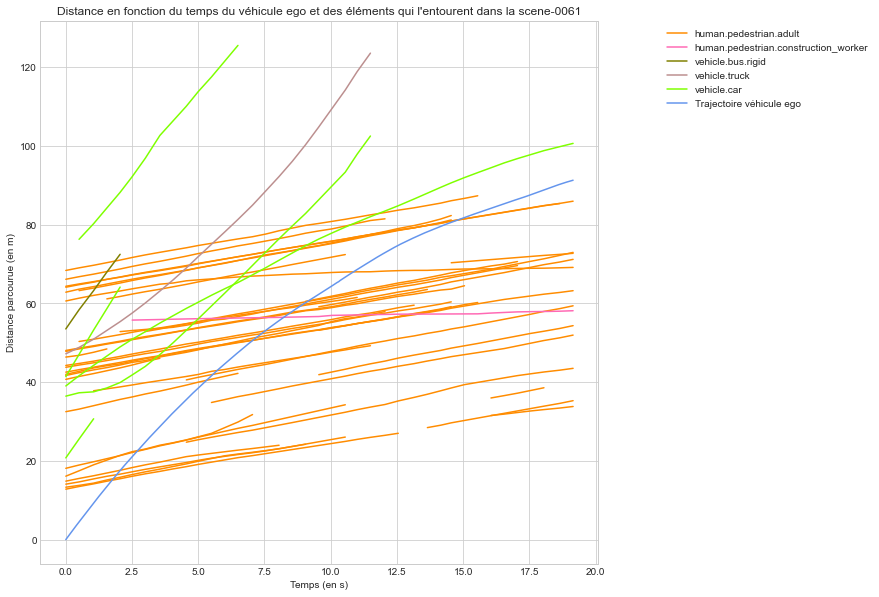

In [40]:
scene_name = 'scene-0061'
dyna_ego_env(scene_name)

### Étape 8 : Test sur plusieurs scènes 

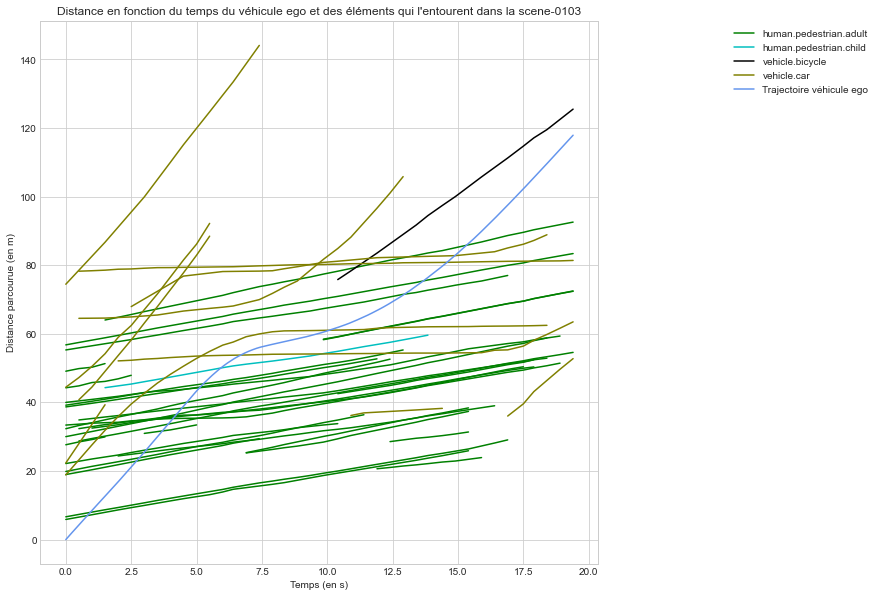

In [41]:
# scene-0103
scene_name = 'scene-0103'
dyna_ego_env(scene_name)

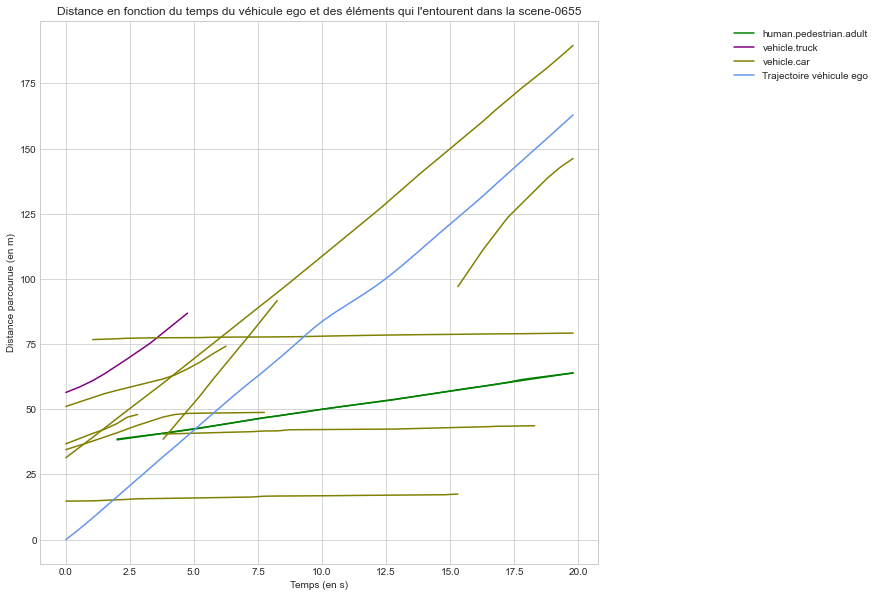

In [42]:
# scene-0655
scene_name = 'scene-0655'
dyna_ego_env(scene_name)

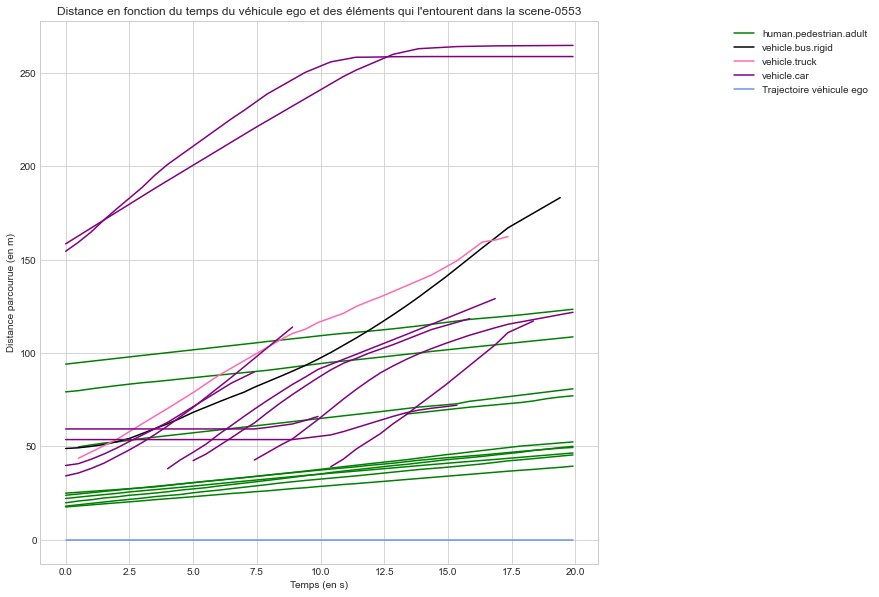

In [43]:
# scene-0553
scene_name = 'scene-0553'
dyna_ego_env(scene_name)

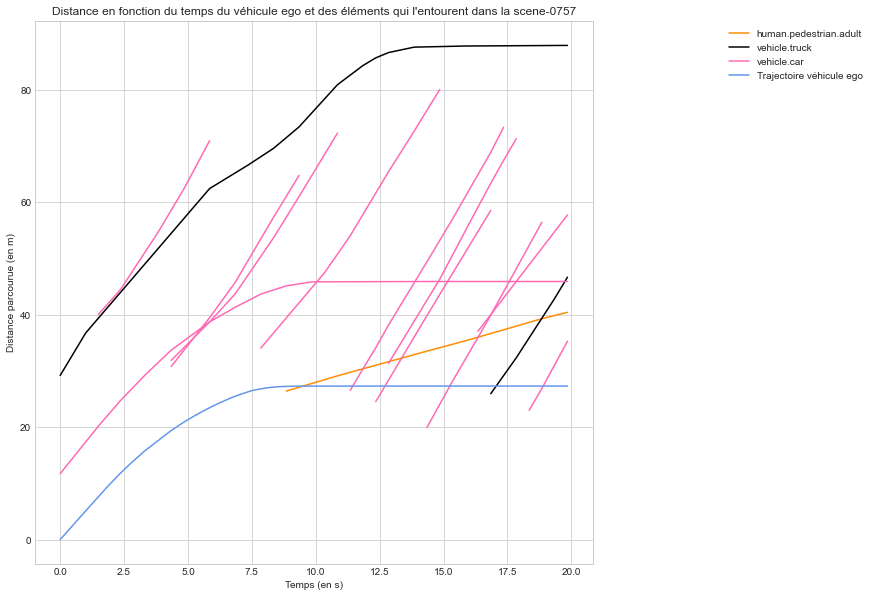

In [44]:
# scene-0757
scene_name = 'scene-0757'
dyna_ego_env(scene_name)

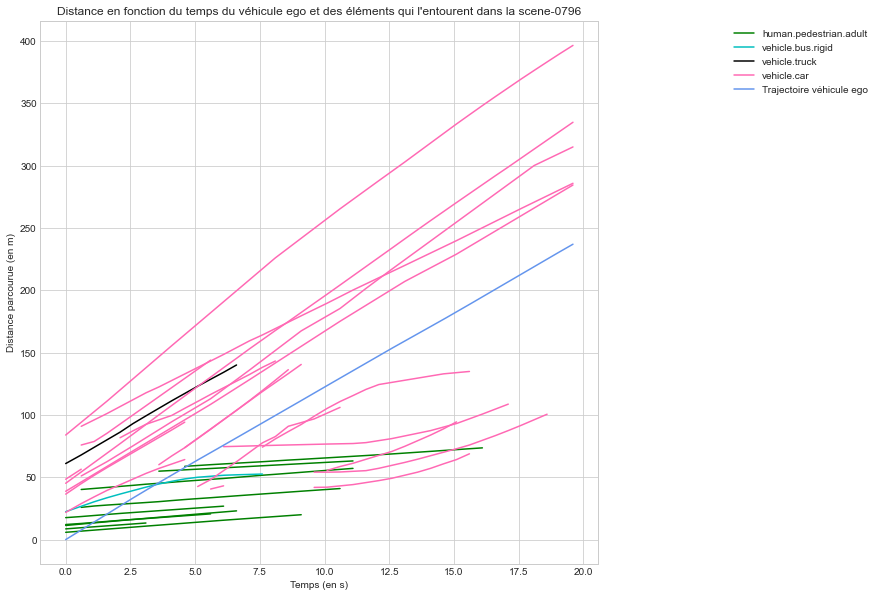

In [45]:
# scene-0796
scene_name = 'scene-0796'
dyna_ego_env(scene_name)

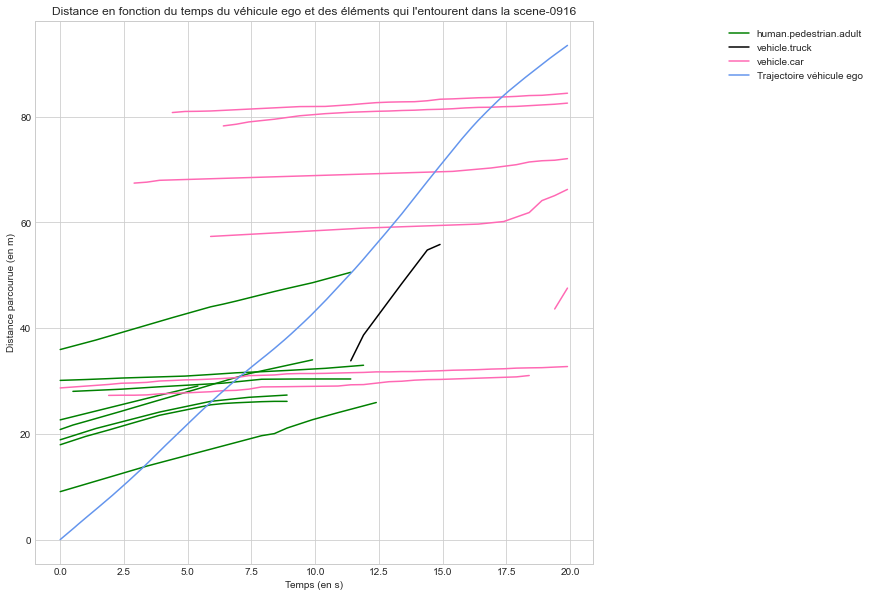

In [46]:
# scene-0916
scene_name = 'scene-0916'
dyna_ego_env(scene_name)

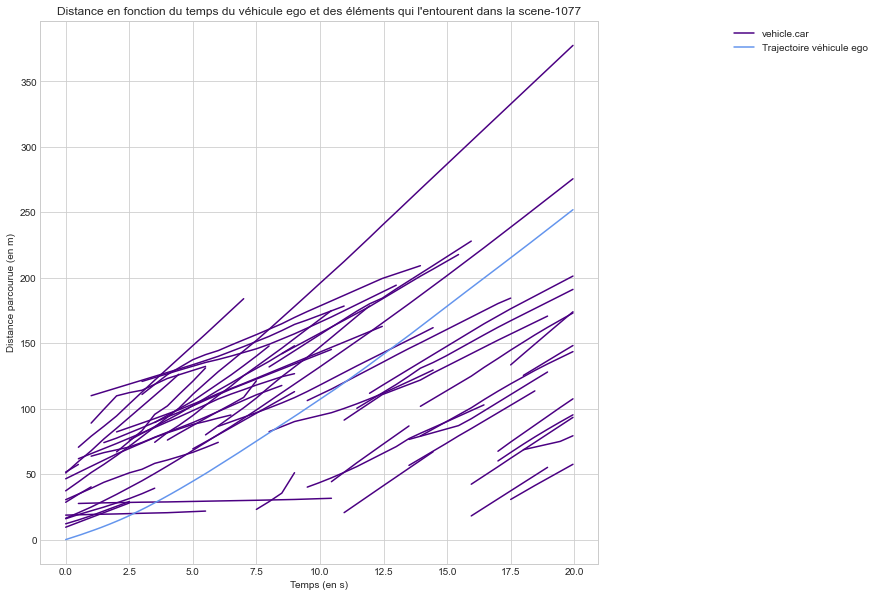

In [47]:
# scene-1077
scene_name = 'scene-1077'
dyna_ego_env(scene_name)

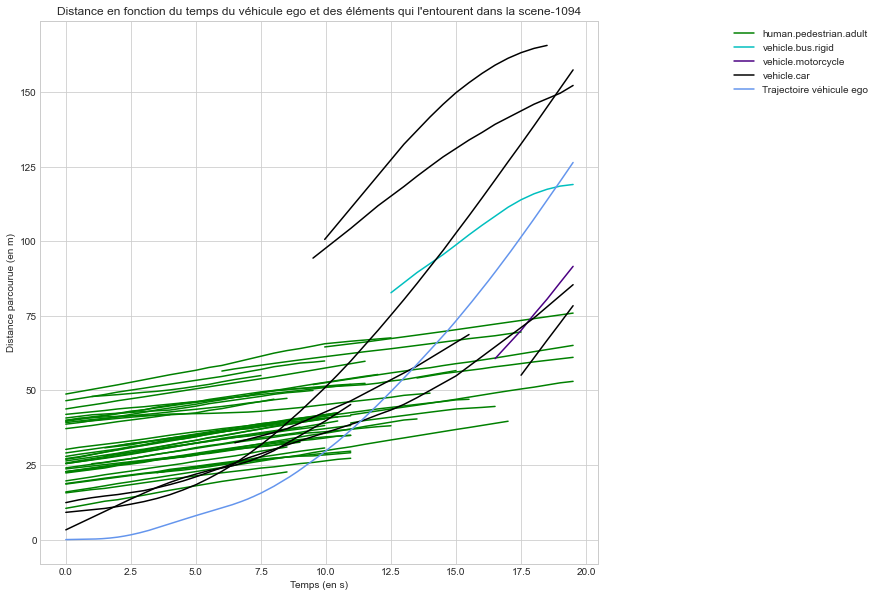

In [48]:
# scene-1094
scene_name = 'scene-1094'
dyna_ego_env(scene_name)

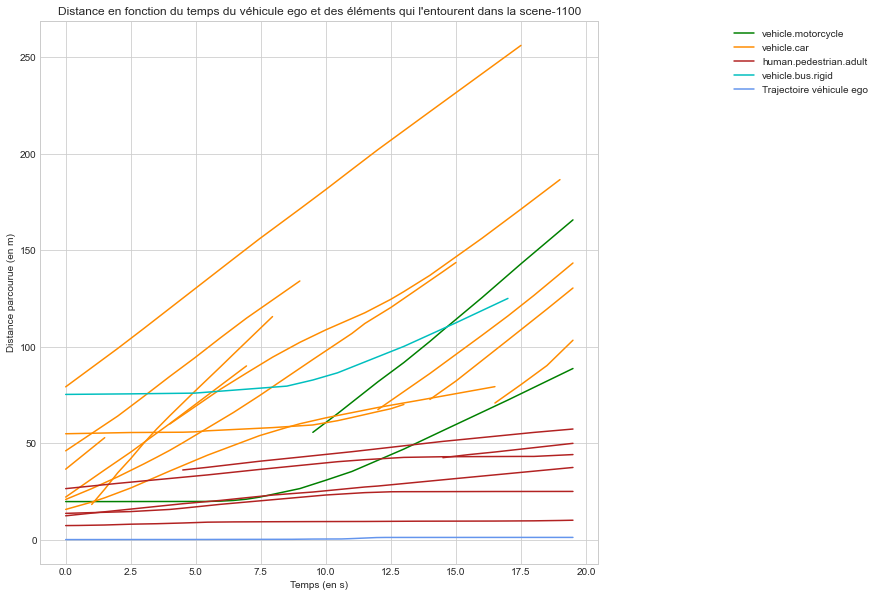

In [49]:
# scene-1100
scene_name = 'scene-1100'
dyna_ego_env(scene_name)

# Trajectoire (t,d) du véhicule ego et des véhicules autour 

In [55]:
# L'interraction avec les piétons n'a pas de sens dans ce type de graphique
# On va donc faire le tracé pour les véhicules seulement.

# De plus, il y a un soucis dans les diagrammes précédents puisqu'avec 
# cette façon de faire, le diagramme (d,t) est tracé comme si le véhicule
# ego était toujours le véhicule suiveur. 
#On va donc créé une fonction qui permet de savoir si un véhicule suit
# le véhicule ego ou est suivi.


### Fonction suiveur

In [50]:
import numpy as np

def suiveur(X_ego,Y_ego,X_veh,Y_veh):
    V1 = np.array([X_ego[0]-X_veh[0],Y_ego[0]-Y_veh[0]])
    V2 = np.array([X_veh[1]-X_veh[0],Y_veh[1]-Y_veh[0]])
    PC = np.vdot(V1,V2)
    if PC >0 :
        return 0 # Le véhicule suit le véhicule ego
    elif PC<0 :
        return 1 # Le véhicule ego suit le véhicule
    else : 
        return 2 # On est parallèle au départ 
    
# La fonction permet de savoir si un véhicule donné dans la scène suit ou non le véhicule ego à partir des coordonnées
# des deux véhicules dans l'espace. La fonction renvoie :
# - 0 si le véhicule suit le véhicule ego
# - 1 si le vehicule est suivit pas le véhicule égo 
# - 2 si les véhicules sont parallèles au départ

### Automatisation du tracé

In [51]:
#imports nécessaires
import matplotlib.pyplot as plt
from math import sqrt
import datetime 
from datetime import timedelta

def dyna_ego_veh(scene_name):
    
    scene_token = nusc.field2token('scene','name',scene_name)[0]
    sample_token = nusc.field2token('sample','scene_token',scene_token)# Ensemble des token des échantillons de la scene 
    
    # Pour tracer la trajectoire du véhicule ego
    Liste_ego_poses = get_poses(scene_token) 
    X_coord =[]
    Y_coord =[]
    Z_coord =[]
    T_timestamp = [] # liste des timestamps
    for k in range(0,len(Liste_ego_poses)):
        X_coord.append(Liste_ego_poses[k]['translation'][0])
        Y_coord.append(Liste_ego_poses[k]['translation'][1])
        Z_coord.append(Liste_ego_poses[k]['translation'][2])
        T_timestamp.append(Liste_ego_poses[k]['timestamp'])

    # On crée les listes de distances et de temps 
    D =[0]
    T=[0]
    for k in range(0,len(T_timestamp)-1):
        D.append(D[k]+sqrt((X_coord[k+1]-X_coord[k])**2+(Y_coord[k+1]-Y_coord[k])**2+(Z_coord[k+1]-Z_coord[k])**2))
        t2 = datetime.datetime.fromtimestamp(T_timestamp[k+1]/ 1e6) # on met les timestamp en datetime
        t1 = datetime.datetime.fromtimestamp(T_timestamp[k]/ 1e6)
        t = T[k]+(t2-t1).total_seconds() # On récupère le temps en seconde 
        T.append(t)
    
    # Ensemble des sample_annotation de la scène :
    sample_annotation_token = []
    for k in sample_token : 
        L = nusc.field2token('sample_annotation','sample_token',k)
        sample_annotation_token = sample_annotation_token + L
    
    # On créé la liste des token des instances présents dans les sample_annotation
    L_instance_token = []
    for k in sample_annotation_token :
        exemple = nusc.get('sample_annotation', k)
        L_instance_token.append(exemple['instance_token'])
    # Puisque pour un même objet, on peut avoir plusieurs annotations, on supprime les doublons de L
    L_instance_token = list(set(L_instance_token))
    
    # Liste des catégories d'objet dans la scène 
    L_category_name = []
    for k in sample_annotation_token :
        exemple = nusc.get('sample_annotation', k)
        L_category_name.append(exemple['category_name'])
    L_category_name = list(set(L_category_name)) #on supprime les doublons 
    
    

    # On crée une liste de 10 couleurs car il y a au maximum 10 catégories de véhicules 
    c = ['g','darkorange','firebrick','c','indigo','hotpink','olive','grey','rosybrown','chartreuse']
    L_vehicule = ['vehicle.bicycle','vehicle.bus.bendy','vehicle.bus.rigid','vehicle.car','vehicle.construction','vehicle.emergency.ambulance','vehicle.emergency.police','vehicle.motorcycle','vehicle.trailer','vehicle.truck']
    
    L_category_name = [k for k in L_category_name if k in L_vehicule]
    
    # Boucle sur chaque catégorie trouvée
    for j in range(0,len(L_category_name)):   
        couleur_catego = c[j]
        catego_name = L_category_name[j]
        catego_token = nusc.field2token('category','name',catego_name)
        category = nusc.get('category',catego_token[0])

        # Ensemble des instances appartenant à la fois à la scène et à la catégorie
        L_instance_category = nusc.field2token('instance','category_token',catego_token[0]) # instance dans la catégorie
        L_instance_category = [x for x in L_instance_category if x in L_instance_token]# et dans la scène 
        L_instance_category
        
        # Il peut y avoir plusieurs éléments de la catégorie dans la scène, ici chaque ligne de L représente 
        # les token des sample_annotation pour un élément de cette catégorie. 

        L=[]
        for k in L_instance_category : 
            instance_category = nusc.get('instance',k)
            nbr_annotations = instance_category['nbr_annotations']
            if nbr_annotations == 1:
                L.append([instance_category['first_annotation_token']])
            else : 
                H = []
                first_token = instance_category['first_annotation_token']
                last_token = instance_category['last_annotation_token']
                current_token = first_token 
        
                s = 0 
                while s!= nbr_annotations :
                    current_ann = nusc.get('sample_annotation', current_token)
                    H.append(current_ann['token'])
                    current_token = current_ann['next'] #On passe au suivant
                    s+=1
                L.append(H)
        
        # Maintenant qu'on a les token de tous les sample_annotation pour tous les éléments d'une même catégorie, 
        # on va pouvoir récupérer leurs positions et tracer leurs trajectoires

        X = []
        Y = []
        Z = []
        T_time = []
        for k in L :
            x = []
            y = []
            z = []
            t = []
            for j in k :
                sample_annotation = nusc.get('sample_annotation',j)
                x.append(sample_annotation['translation'][0])
                y.append(sample_annotation['translation'][1])
                z.append(sample_annotation['translation'][2])
                t.append(nusc.get('sample',sample_annotation['sample_token'])['timestamp'])
            X.append(x)
            Y.append(y)
            Z.append(z)
            T_time.append(t)
        
        D_catego =[]
        T_catego =[]
        
        # On crée les listes des objets immobiles et mobiles de la catégorie
        Immo, Mobile = immobile(X,Y)
        
        for j in Mobile :
           
            if T_timestamp[0] == T_time[j][0] : # Même t départ avec le véhicule ego :
                d0 = sqrt((X[j][0]-X_coord[0])**2+(Y[j][0]-Y_coord[0])**2+(Z[j][0]-Z_coord[0])**2)
                t_time = [0]
                
                # On regarde si le véhicule suit ou non le véhicule égo pour connaître le signe de d0 
                if suiveur(X_coord,Y_coord,X[j],Y[j]) == 0 :
                    d = [-d0]
                elif suiveur(X_coord,Y_coord,X[j],Y[j]) == 1 :
                    d = [d0]
                else :
                    d = [d0] # ? 
            
            else : # t de départ différent avec le véhicule ego 
    
                # Décalage dans le temps
                t_time = [(datetime.datetime.fromtimestamp(T_time[j][0]/ 1e6) - datetime.datetime.fromtimestamp(T_timestamp[0]/ 1e6)).total_seconds()]
    
                # Décalage dans l'espace 
                e = T_timestamp.index(T_time[j][0])
                # Avec e l'indice du timestamp du véhicule égo pour lequel le timestamp correspondant est égal au premier timestamp de l'élément de la catégorie
                d0 = sqrt((X[j][0]-X_coord[e])**2+(Y[j][0]-Y_coord[e])**2+(Z[j][0]-Z_coord[e])**2)
               
                # On regarde si le véhicule suit ou non le véhicule égo pour connaître le signe de d0 
                if suiveur(X_coord,Y_coord,X[j],Y[j]) == 0 :
                    d = [-d0]
                elif suiveur(X_coord,Y_coord,X[j],Y[j]) == 1 :
                    d = [d0]
                else :
                    d = [d0]
                    
            for k in range(0,len(X[j])-1):
                d.append(d[k]+sqrt((X[j][k+1]-X[j][k])**2+(Y[j][k+1]-Y[j][k])**2+(Z[j][k+1]-Z[j][k])**2))
                t2 = datetime.datetime.fromtimestamp(T_time[j][k+1]/ 1e6) # on met les timestamp en datetime
                t1 = datetime.datetime.fromtimestamp(T_time[j][k]/ 1e6)
                t = t_time[k]+(t2-t1).total_seconds() # On récupère le temps en seconde 
                t_time.append(t)
            D_catego.append(d)
            T_catego.append(t_time)
        
        fig = plt.figure(1, figsize=(10, 10))
        
        if len(Mobile)==1 :
            plt.plot(T_catego[0],D_catego[0],label=catego_name,color=couleur_catego)
        elif len(Mobile)>1:
            plt.plot(T_catego[0],D_catego[0],label=catego_name,color=couleur_catego)
            for i in range(1,len(Mobile)):
                plt.plot(T_catego[i],D_catego[i],color=couleur_catego)

    # On trace 
    plt.plot(T,D,label ='Trajectoire véhicule ego',color='cornflowerblue')
    plt.xlabel('Temps (en s)') 
    plt.ylabel('Distance parcourue (en m)') # Les x,y,z sont en m 
    plt.legend(bbox_to_anchor=(1.5, 1.0),loc='best')
    plt.title("Distance en fonction du temps du véhicule ego et des éléments qui l'entourent dans la "+scene_name)
    plt.show()

## Pour le cas ou le PS vaut 0, on met quoi comme signe ? 


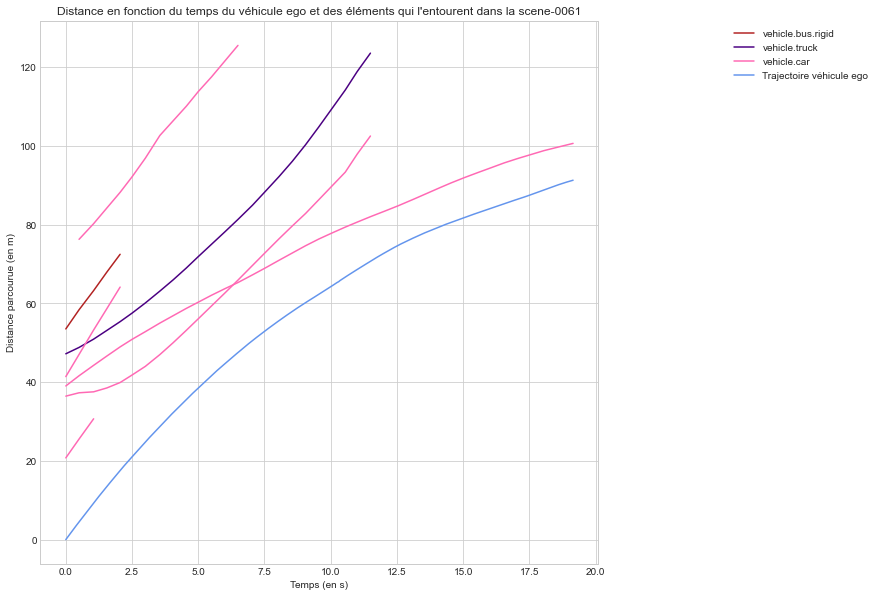

In [52]:
scene_name = 'scene-0061'
dyna_ego_veh(scene_name)

### Test sur plusieurs trajectoires

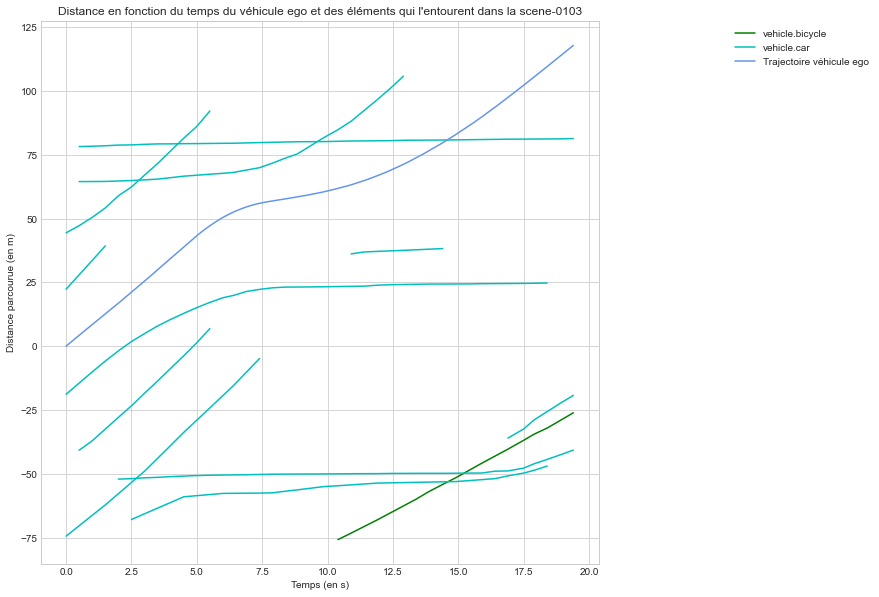

In [53]:
# scene-0103
scene_name = 'scene-0103'
dyna_ego_veh(scene_name)

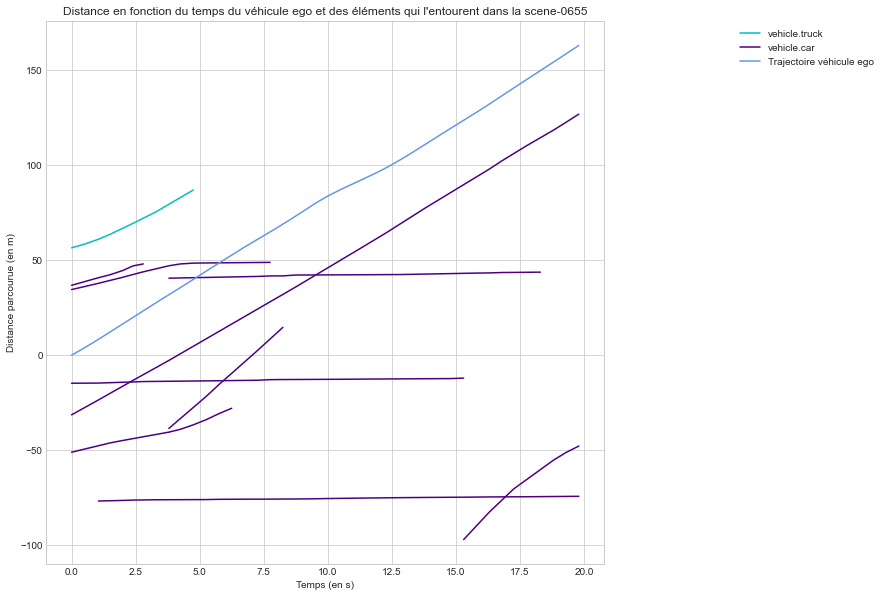

In [54]:
# scene-0655
scene_name = 'scene-0655'
dyna_ego_veh(scene_name)

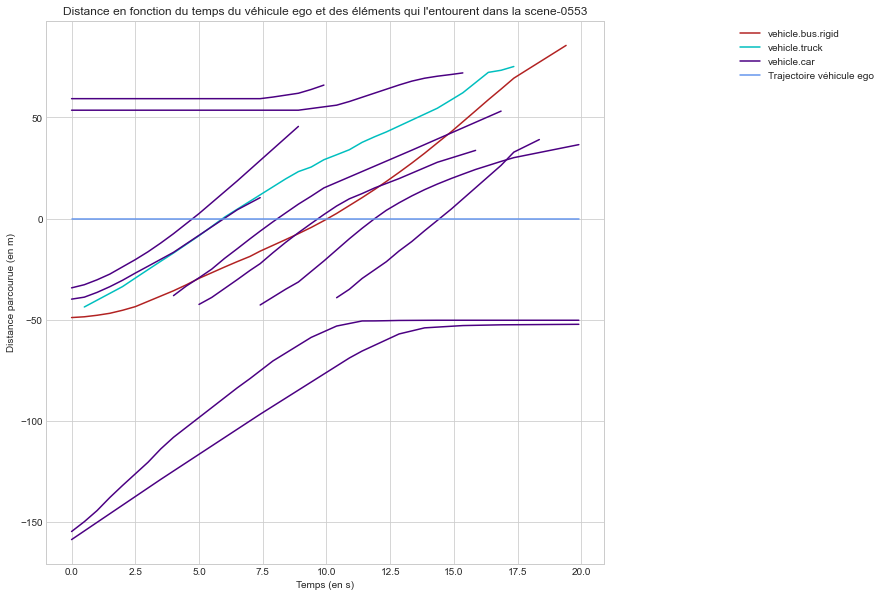

In [55]:
# scene-0553
scene_name = 'scene-0553'
dyna_ego_veh(scene_name)

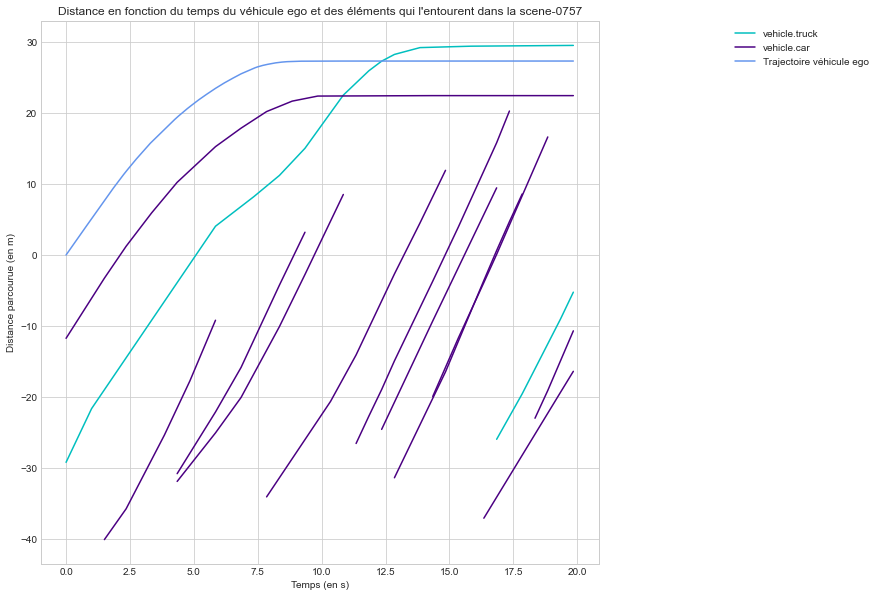

In [56]:
# scene-0757
scene_name = 'scene-0757'
dyna_ego_veh(scene_name)

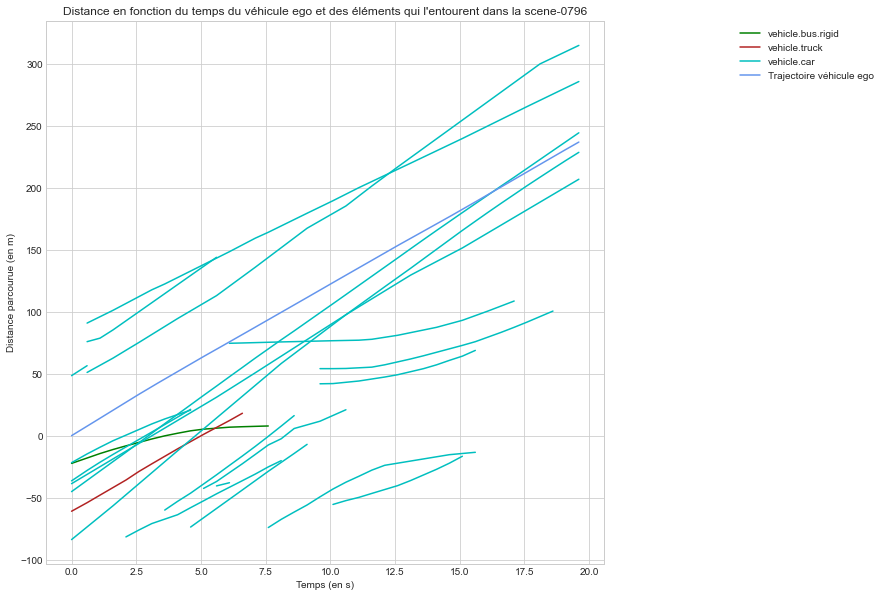

In [57]:
# scene-0796
scene_name = 'scene-0796'
dyna_ego_veh(scene_name)

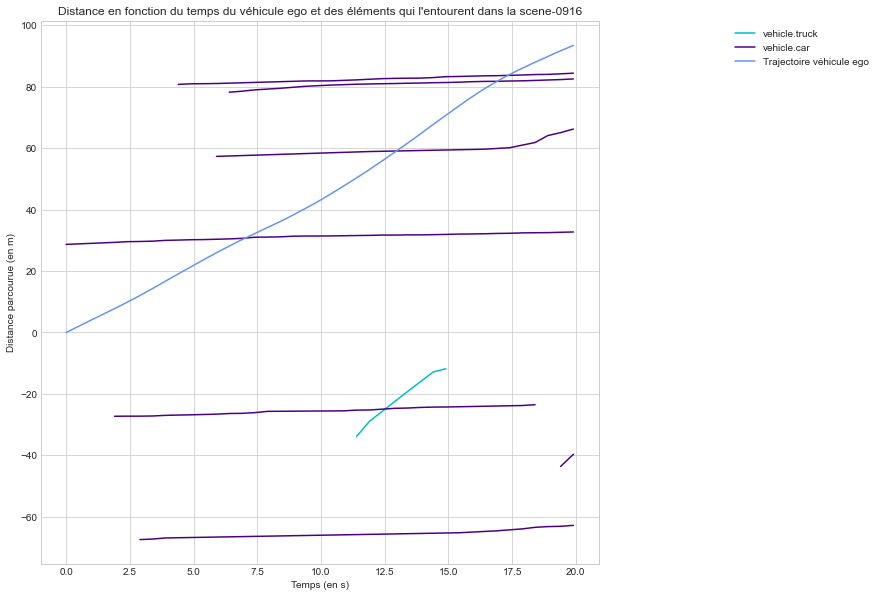

In [58]:
# scene-0916
scene_name = 'scene-0916'
dyna_ego_veh(scene_name)

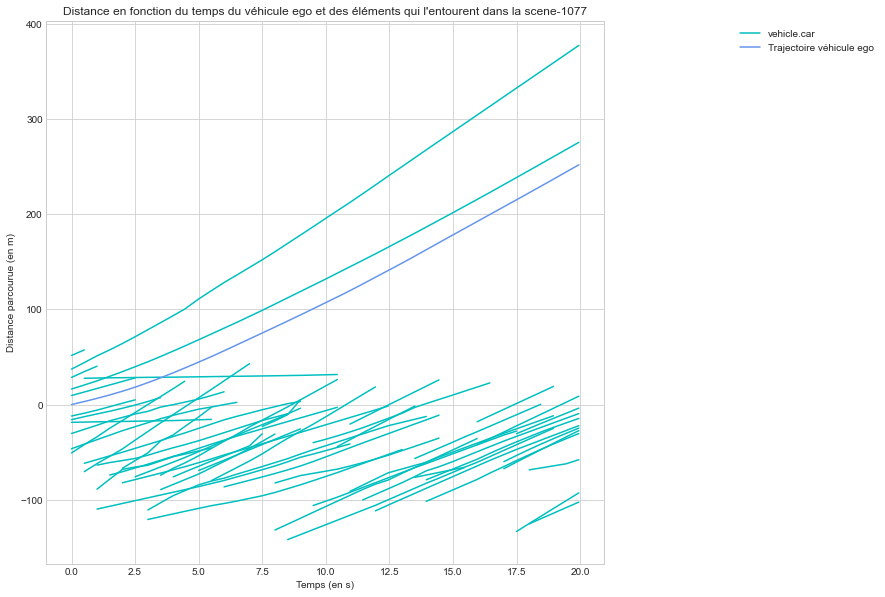

In [59]:
# scene-1077
scene_name = 'scene-1077'
dyna_ego_veh(scene_name)

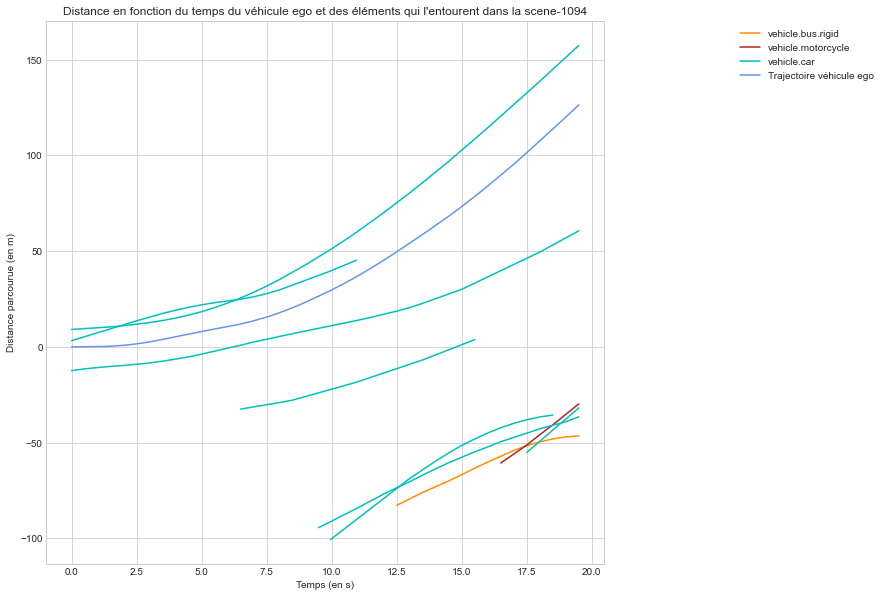

In [60]:
# scene-1094
scene_name = 'scene-1094'
dyna_ego_veh(scene_name)

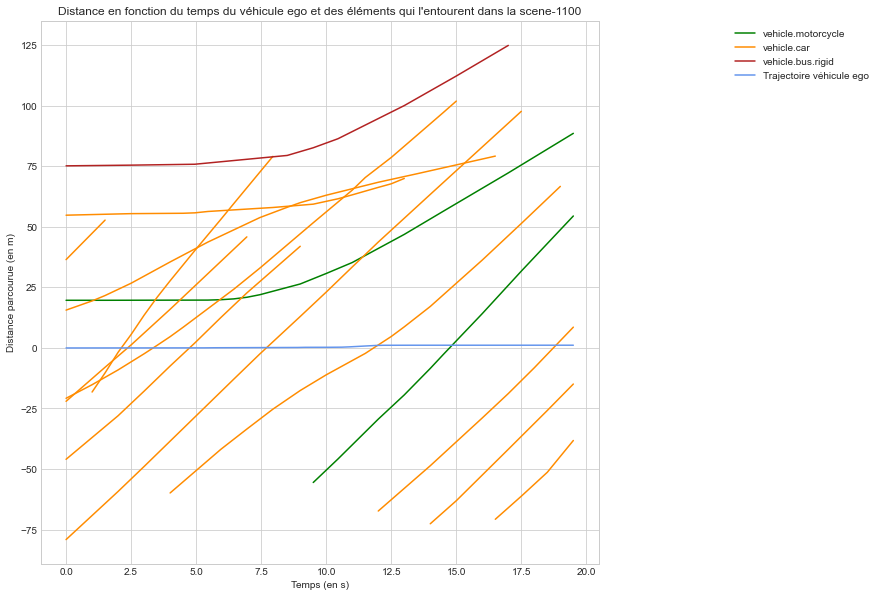

In [61]:
# scene-1100
scene_name = 'scene-1100'
dyna_ego_veh(scene_name)